In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 1. 💾 Loading the data:

In [5]:
data = np.loadtxt("data/ECG5000_TRAIN.txt")

labels=data[:,0].astype(int)  # Extract the labels
signals=data[:,1:]            # Extract the signals

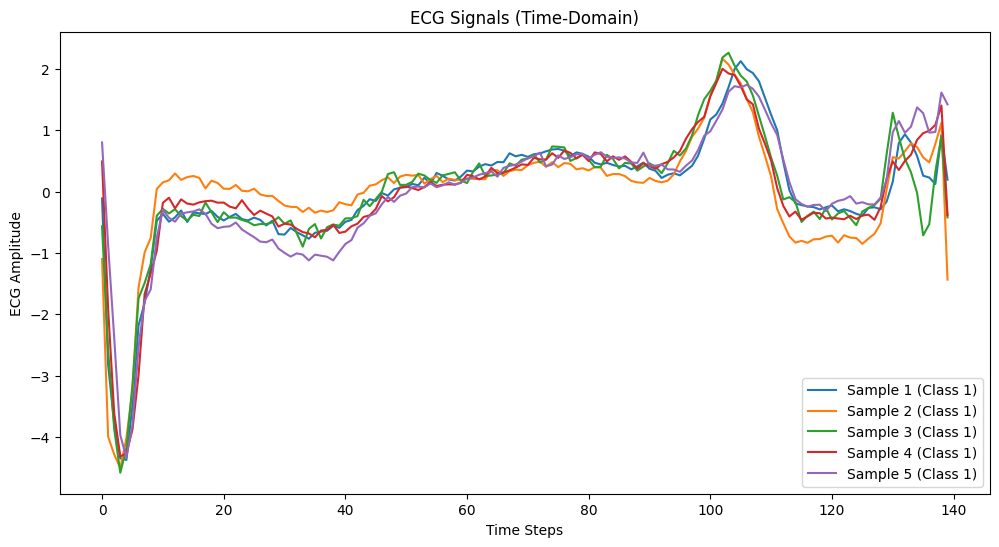

In [6]:
num_samples = 5

plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(signals[i], label=f"Sample {i+1} (Class {int(labels[i])})")

plt.xlabel("Time Steps")
plt.ylabel("ECG Amplitude")
plt.title("ECG Signals (Time-Domain)")
plt.legend()
plt.show()

In [7]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
signals

array([[-1.1252183e-01, -2.8272038e+00, -3.7738969e+00, ...,
         1.2343082e-01,  9.2528624e-01,  1.9313742e-01],
       [-1.1008778e+00, -3.9968398e+00, -4.2858426e+00, ...,
         7.7381971e-01,  1.1196209e+00, -1.4362499e+00],
       [-5.6708802e-01, -2.5934502e+00, -3.8742297e+00, ...,
         3.2109663e-01,  9.0422673e-01, -4.2179659e-01],
       ...,
       [-2.1963843e-02, -9.1243389e-01, -1.9033529e+00, ...,
         1.4442803e+00,  1.4323469e+00,  1.4570283e+00],
       [ 2.8801100e-01, -1.0980196e+00, -2.5002499e+00, ...,
         4.9872417e-02,  1.0914960e-02, -8.1534236e-02],
       [-1.1336738e+00, -2.7029409e+00, -3.1209789e+00, ...,
        -1.1084010e-01,  1.8580663e-03, -1.2263937e-01]], shape=(500, 140))

In [9]:
signals.shape

(500, 140)

## 2. Concatenate signals:

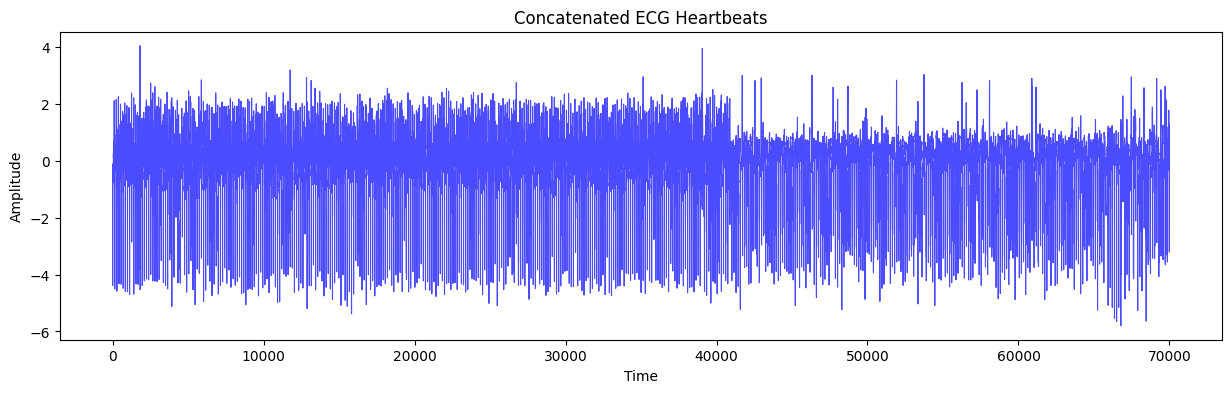

In [10]:
# Concatenate all ECG signals into one long time-series
concatenated_signal = signals.flatten()
# Plot concatenated heartbeats
plt.figure(figsize=(15, 4))
plt.plot(concatenated_signal, color='blue', alpha=0.7, linewidth=0.8)
plt.title("Concatenated ECG Heartbeats")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# 📊 Visualizing Concatenated ECG Signals with Normalization

## 🔹 Step 1: Normalize the Signals
To improve visualization, the ECG signals are standardized using `StandardScaler` from `sklearn.preprocessing`. This ensures that each feature (ECG signal) has **zero mean** and **unit variance**, making it easier to compare different signals on the same scale.

```python
# Normalize the signals for better visualization
scaler = StandardScaler()
signals_normalized = scaler.fit_transform(signals)


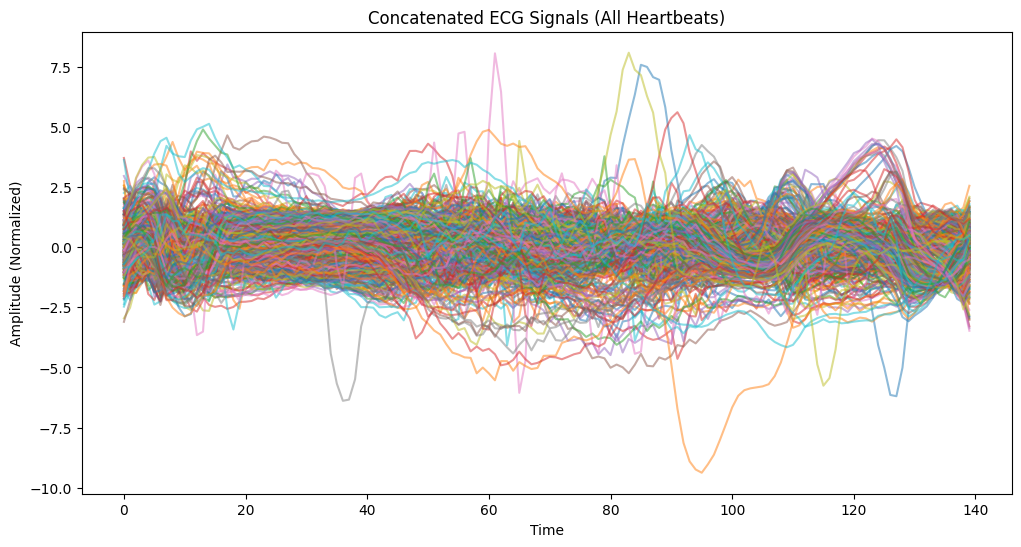

In [11]:
# Normalize the signals for better visualization
scaler = StandardScaler()
signals_normalized = scaler.fit_transform(signals)

# Concatenate all heartbeats and plot them
plt.figure(figsize=(12, 6))
plt.plot(signals_normalized.T, alpha=0.5)
plt.title("Concatenated ECG Signals (All Heartbeats)")
plt.xlabel("Time")
plt.ylabel("Amplitude (Normalized)")
plt.show()

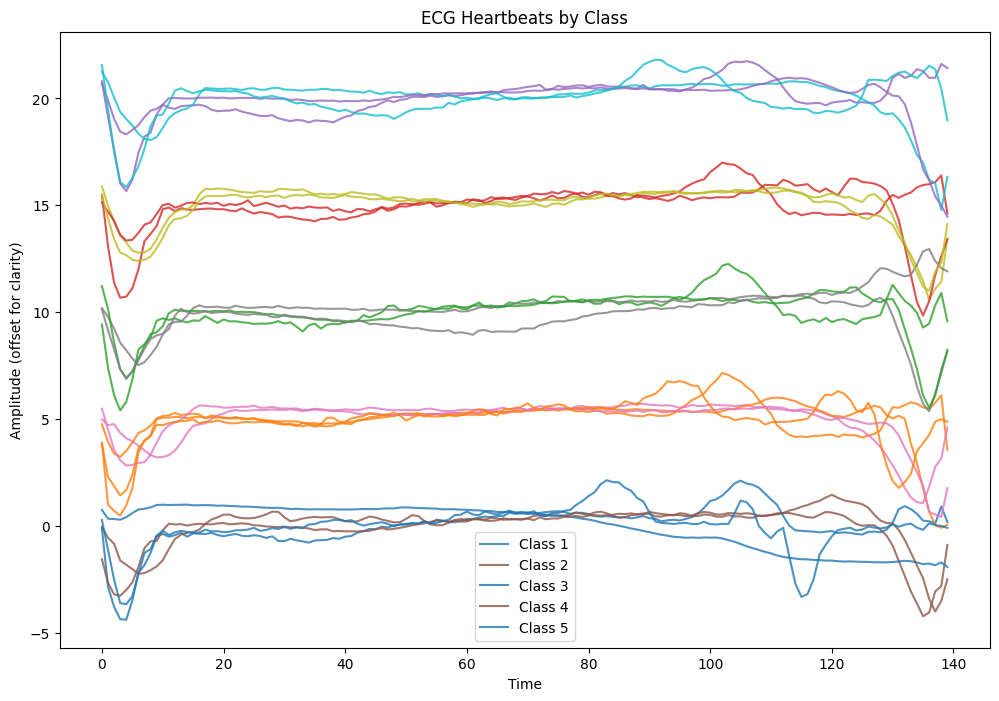

In [12]:
unique_classes= np.unique(labels)

plt.figure(figsize=(12,8))

for i, class_label in enumerate(unique_classes):
    #Select the first few examples from each class
    class_signals = signals[labels == class_label][:5]
    for j,sig in enumerate(class_signals):
        plt.plot(sig+j*5,label=f"Class {class_label}" if j==0 else "", alpha=0.8)
plt.title("ECG Heartbeats by Class")
plt.xlabel("Time")
plt.ylabel("Amplitude (offset for clarity)")
plt.legend()
plt.show()        

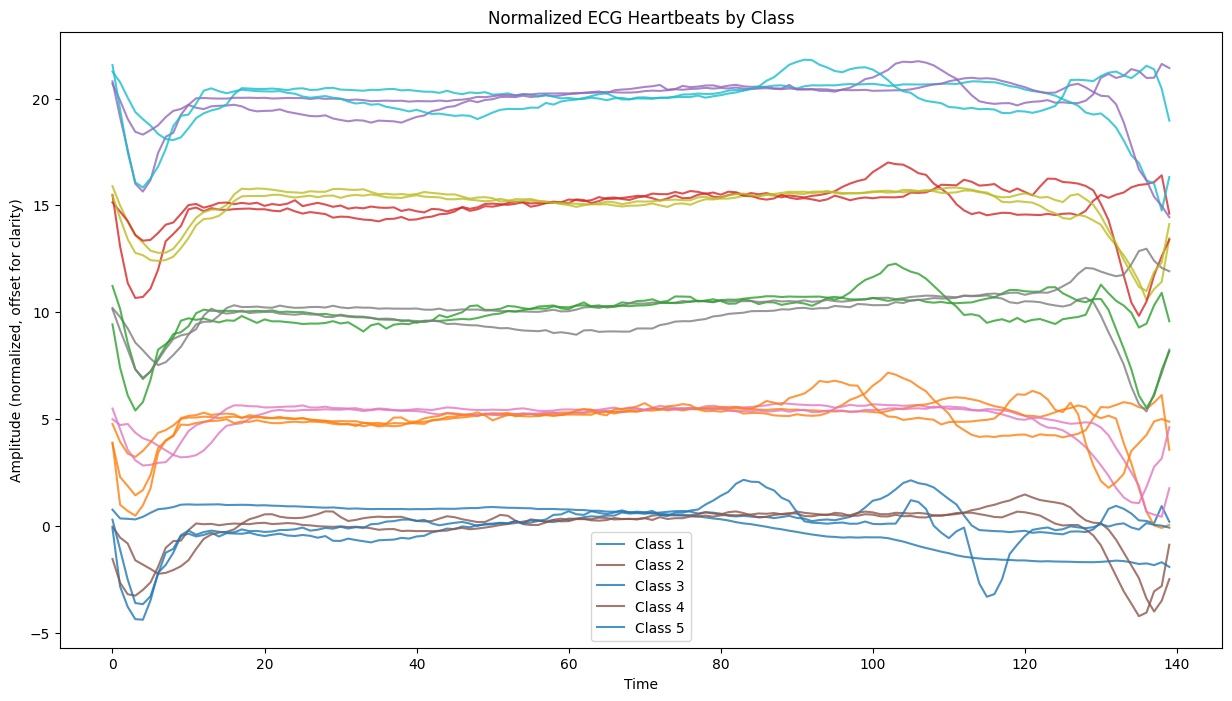

In [13]:
# Function to normalize ECG signals
def normalize_signal(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Apply normalization
normalized_signals = np.apply_along_axis(normalize_signal, 1, signals)

# Plot normalized heartbeats per class
plt.figure(figsize=(15, 8))
for i, class_label in enumerate(unique_classes):
    class_signals = normalized_signals[labels == class_label][:5]
    
    for j, sig in enumerate(class_signals):
        plt.plot(sig + j * 5, label=f"Class {class_label}" if j == 0 else "", alpha=0.8)

plt.title("Normalized ECG Heartbeats by Class")
plt.xlabel("Time")
plt.ylabel("Amplitude (normalized, offset for clarity)")
plt.legend()
plt.show()


## Normalization functions

In [14]:
def min_max_normalize(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

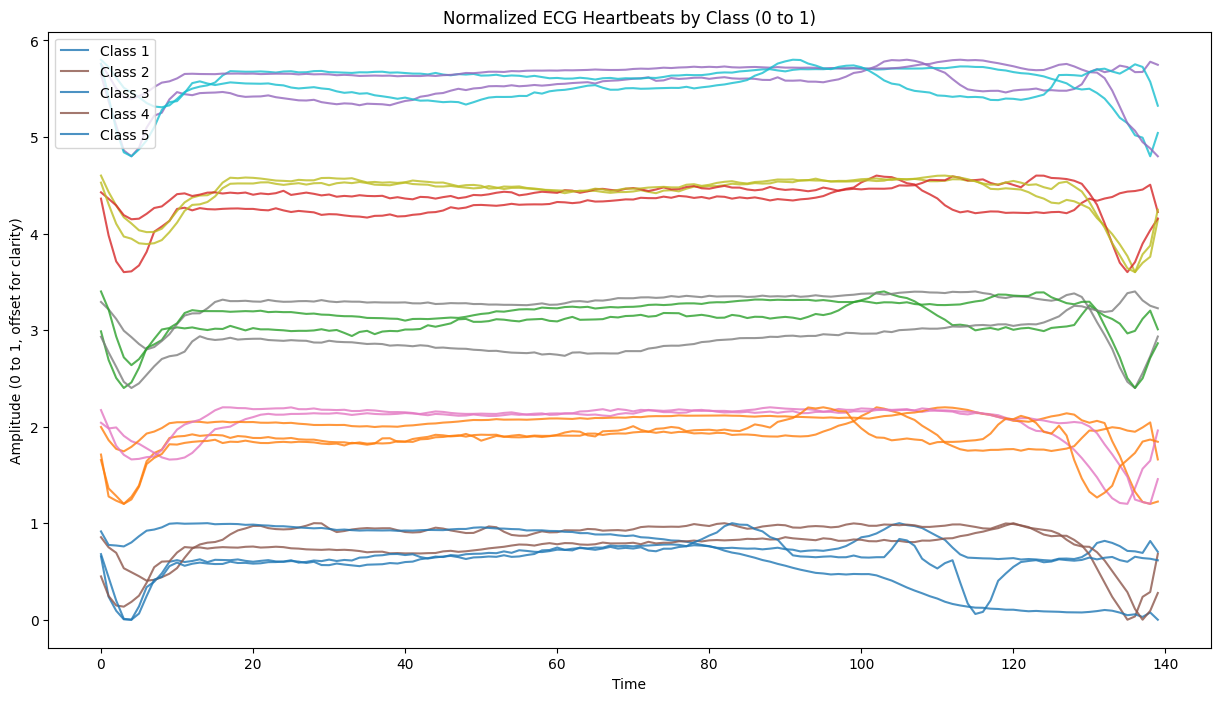

In [15]:
normalized_signals=np.apply_along_axis(min_max_normalize,1,signals)

plt.figure(figsize=(15,8))

for i,class_label in enumerate(unique_classes):
    class_signals=normalized_signals[labels==class_label][:5]
    for j,sig in enumerate(class_signals):
        plt.plot(sig + j * 1.2, label=f"Class {class_label}" if j == 0 else "", alpha=0.8)



plt.title("Normalized ECG Heartbeats by Class (0 to 1)")
plt.xlabel("Time")
plt.ylabel("Amplitude (0 to 1, offset for clarity)")
plt.legend()
plt.show()    

In [16]:
X=np.linspace(0,1,1000,endpoint=False)

Y= np.sin(X)

fft_res= np.fft.fft(Y)

freqs = np.fft.fft

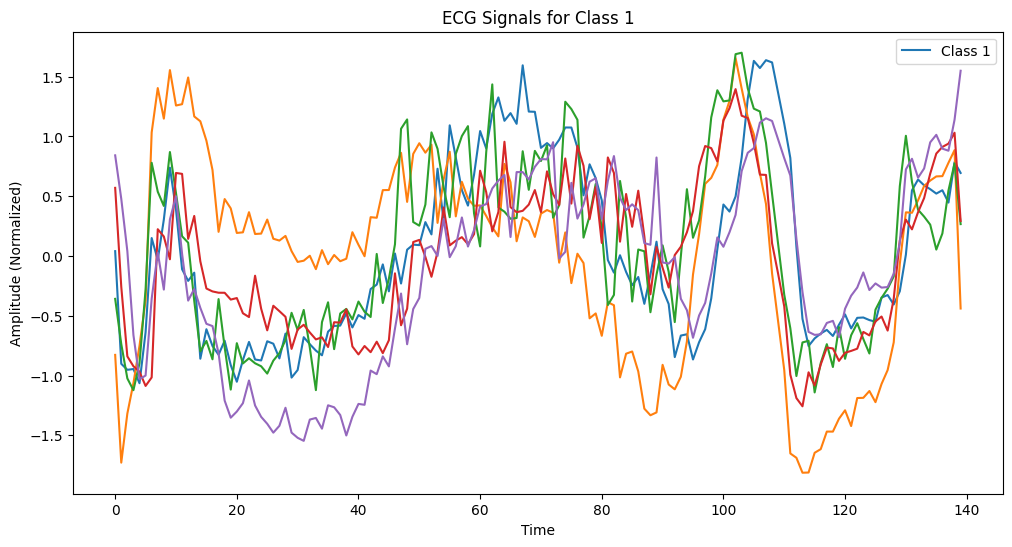

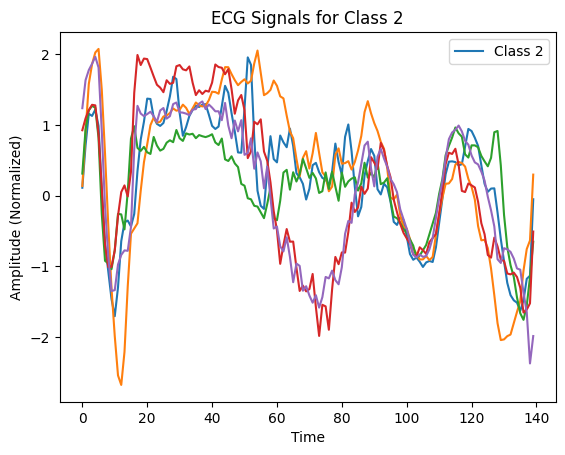

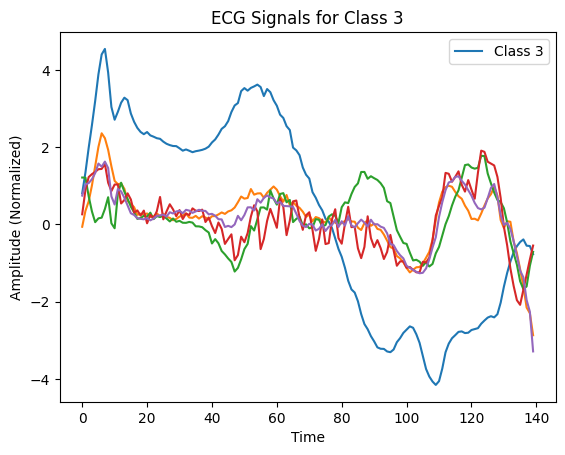

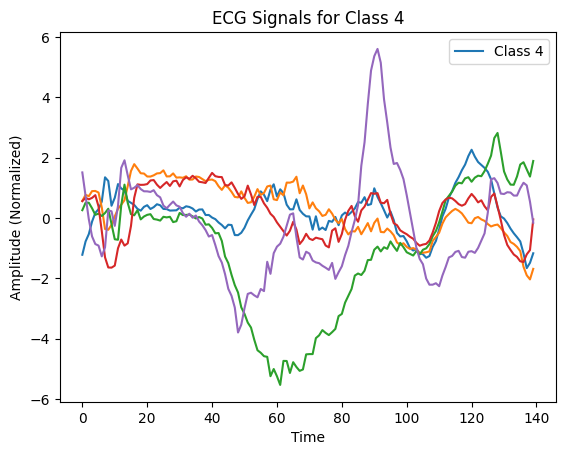

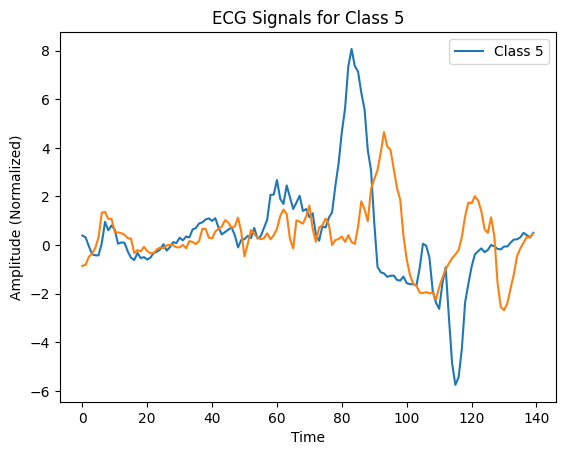

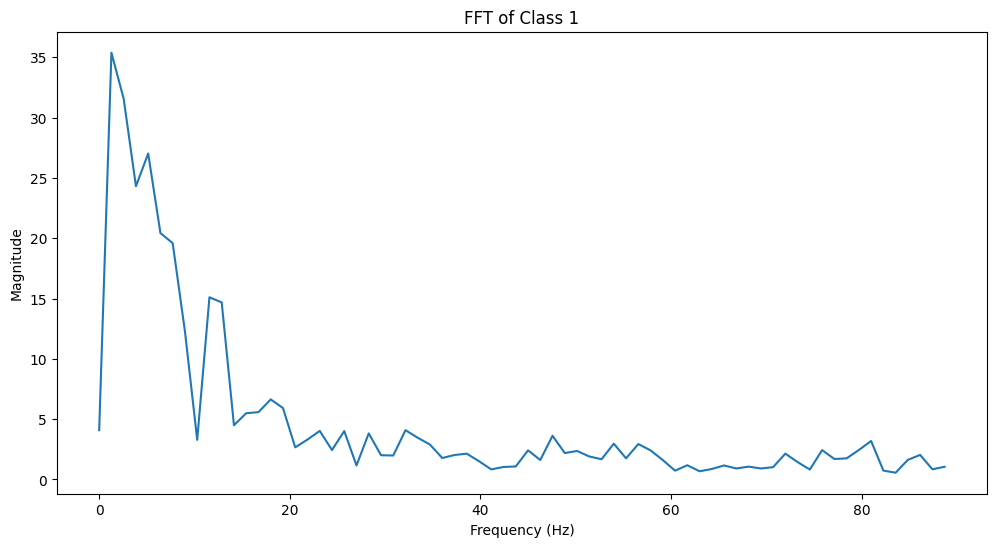

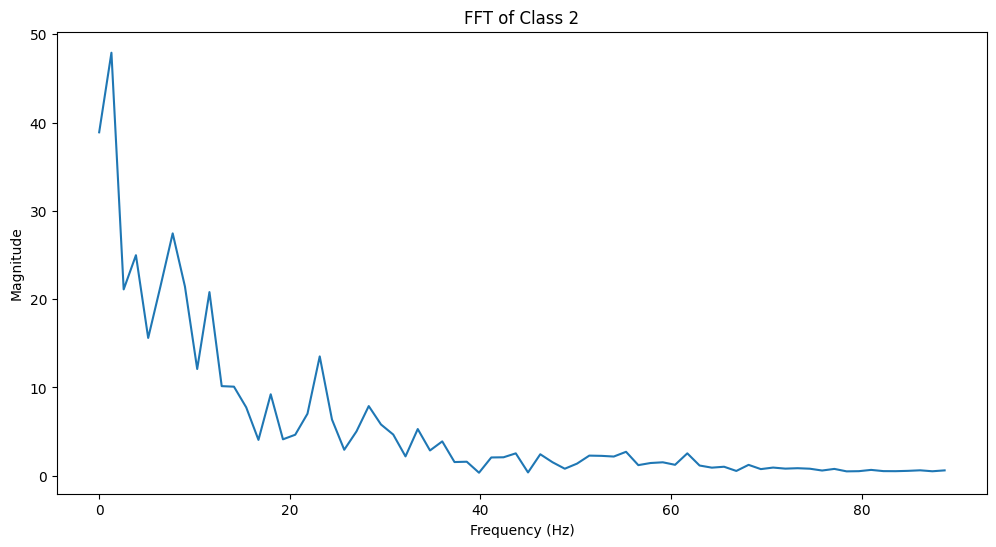

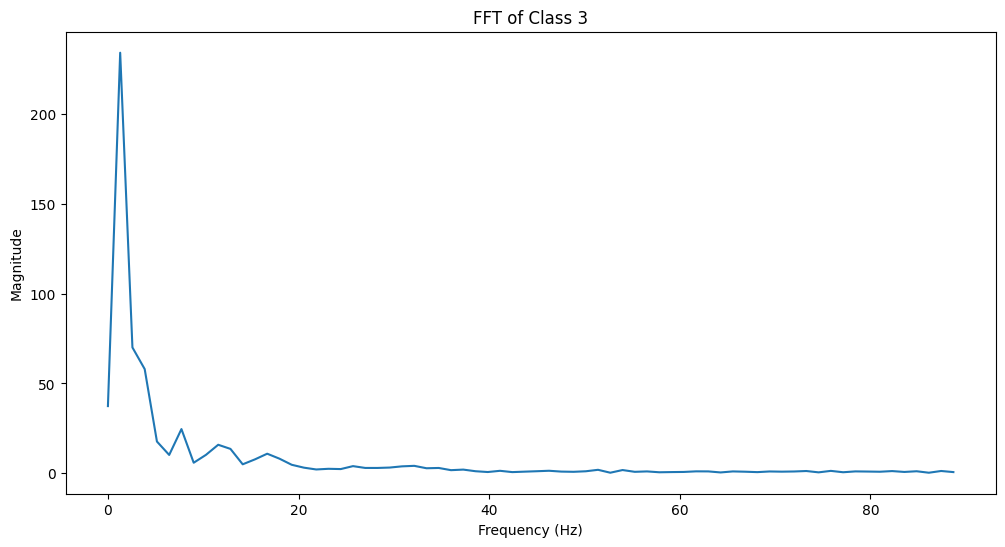

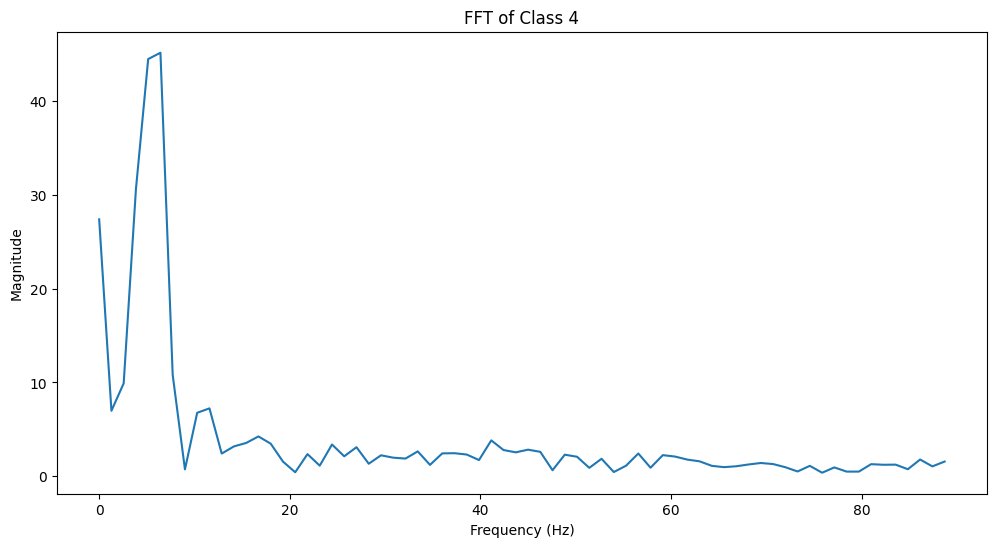

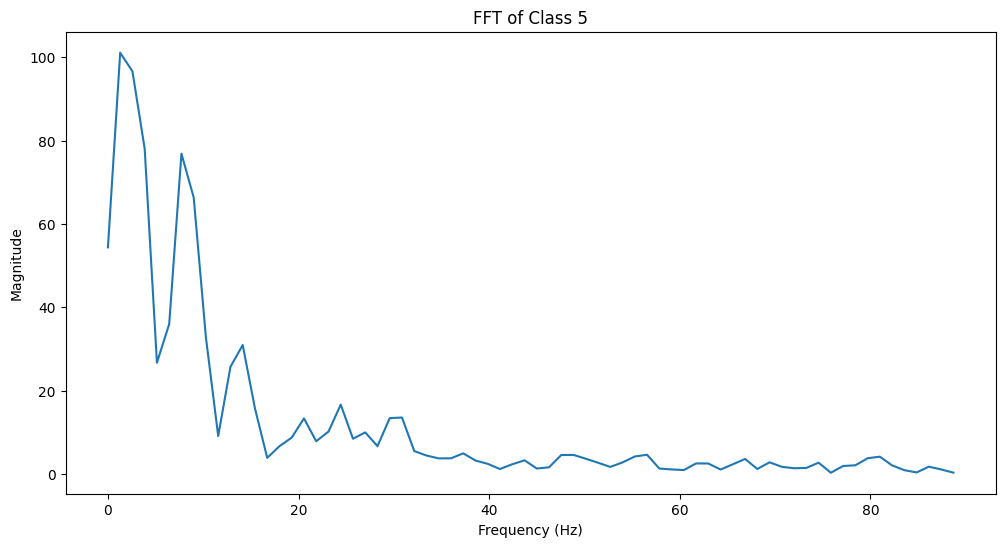

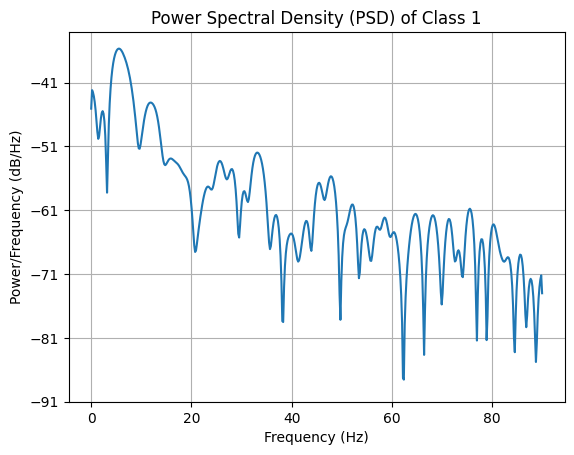

C:\Users\MANSOUB YAHYA\AppData\Local\Temp\ipykernel_39500\727803660.py:64: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  f, t, Sxx = spectrogram(signal, fs=180, nperseg=256)


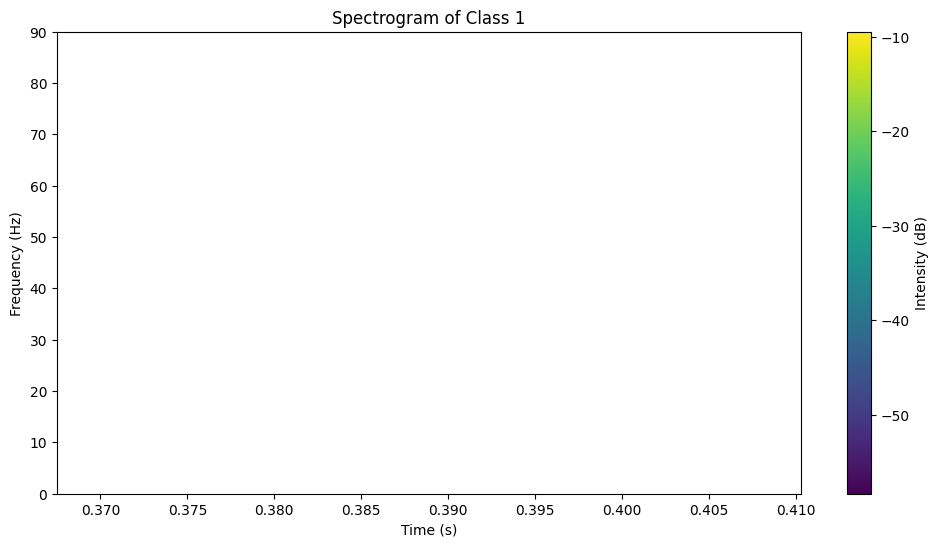

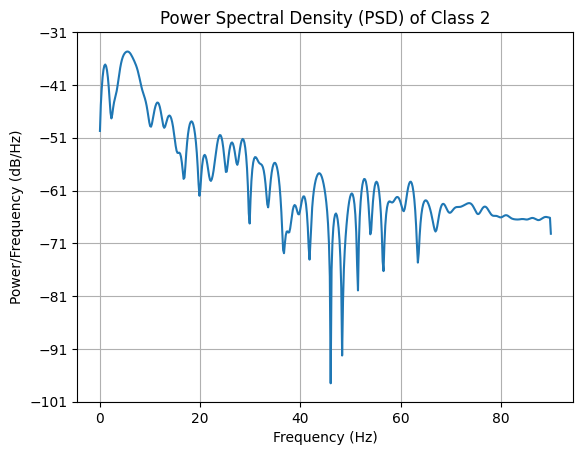

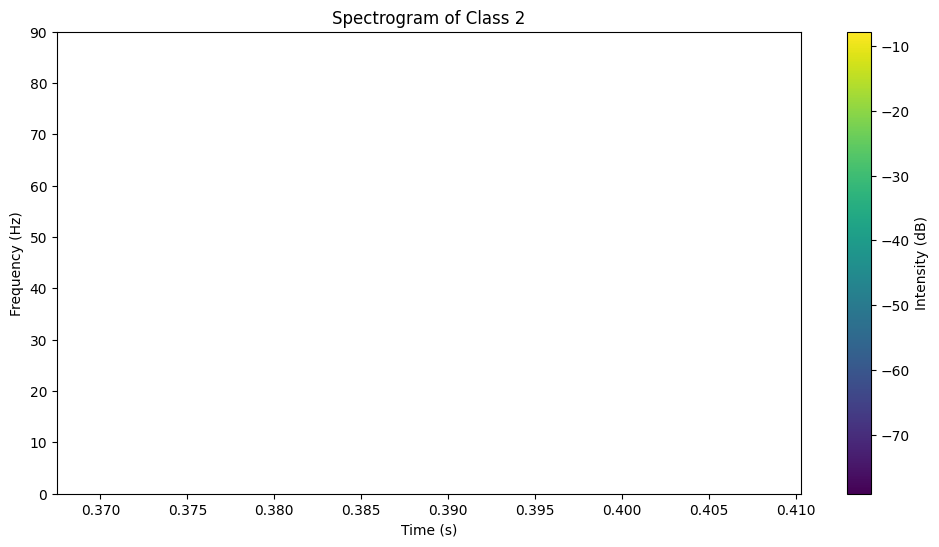

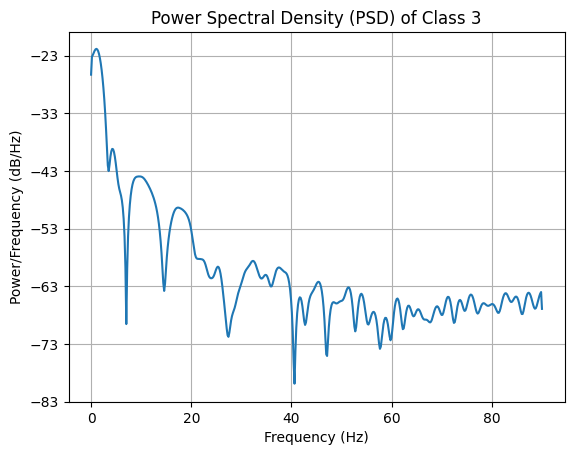

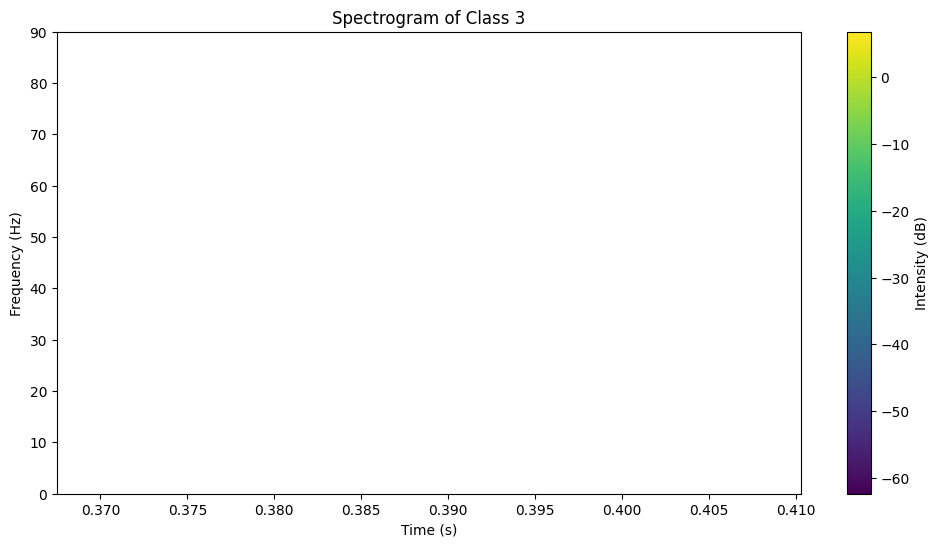

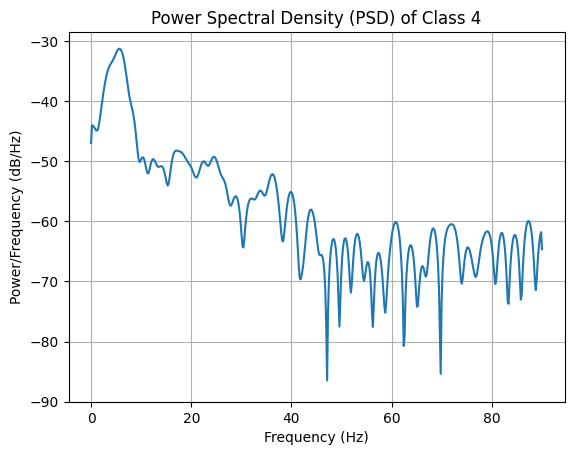

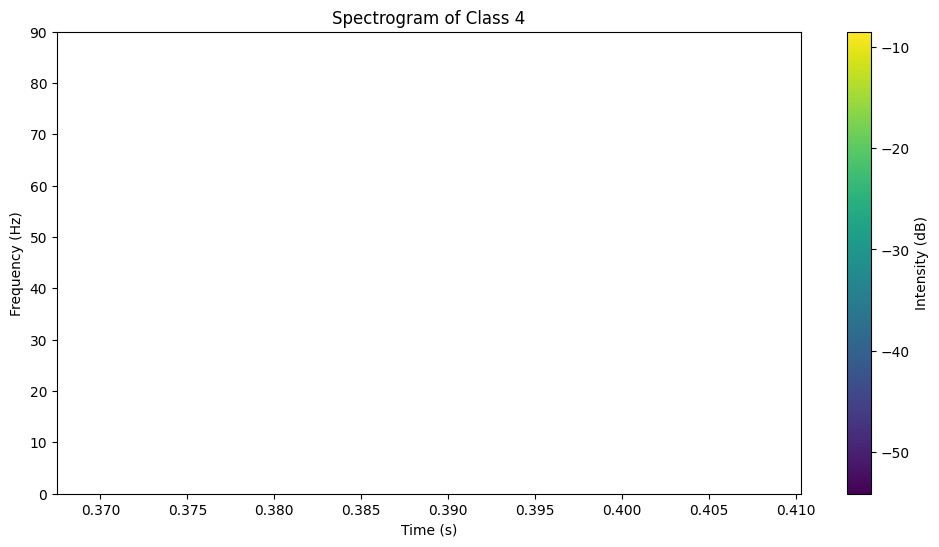

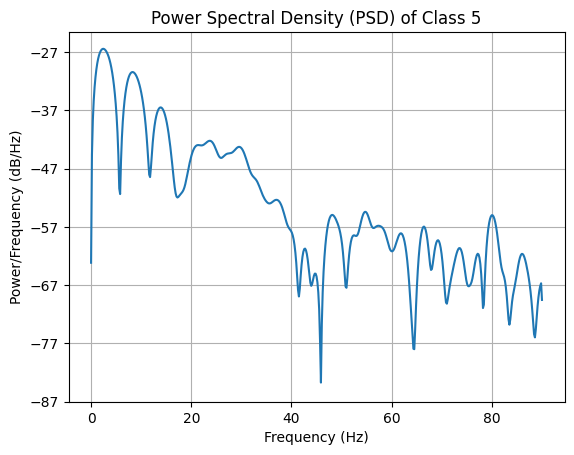

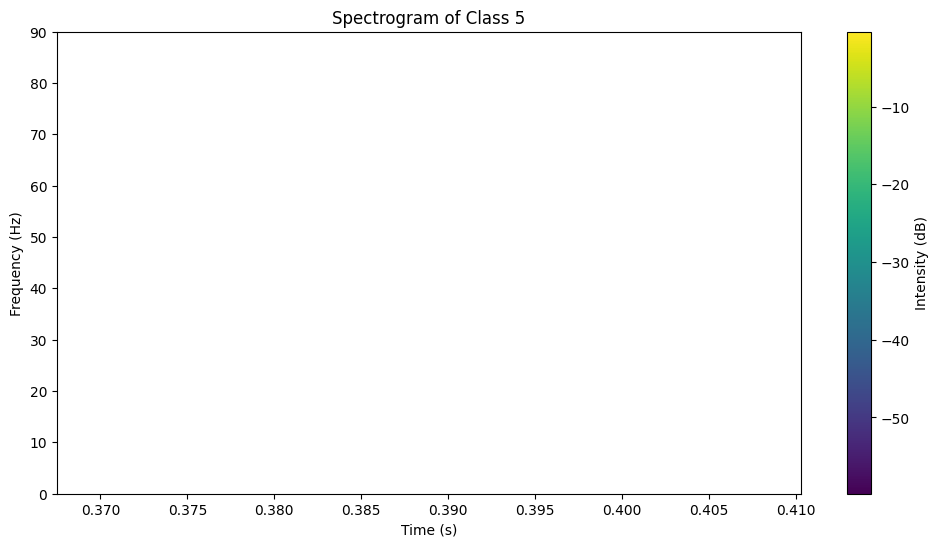

In [17]:
# Import necessary libraries


# Load the ECG5000 dataset
# The dataset can be downloaded from: https://www.timeseriesclassification.com/description.php?Dataset=ECG5000
# Assuming the dataset is saved as a CSV file



# Cluster the heartbeats by class and plot subsets (one per class)
unique_classes = np.unique(labels)
plt.figure(figsize=(12, 6))

for i, class_label in enumerate(unique_classes):
    # Select signals for the current class
    class_signals = signals_normalized[labels == class_label]

    # Plot the first 5 signals for each class
    for j in range(min(5, len(class_signals))):
        plt.plot(class_signals[j],
                 label=f"Class {class_label}" if j == 0 else "")

    plt.title(f"ECG Signals for Class {class_label}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude (Normalized)")
    plt.legend()
    plt.show()

# Apply FFT to analyze frequency-domain components


def plot_fft(signal, title):
    n = len(signal)
    freq = fftfreq(n, d=1/180)  # Assuming a sampling rate of 180 Hz
    fft_values = fft(signal)

    plt.figure(figsize=(12, 6))
    plt.plot(freq[:n//2], np.abs(fft_values[:n//2]))
    plt.title(f"FFT of {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


# Plot FFT for a representative signal from each class
for class_label in unique_classes:
    class_signals = signals_normalized[labels == class_label]
    # Take the first signal as representative
    representative_signal = class_signals[0]
    plot_fft(representative_signal, f"Class {class_label}")

# Plot Power Spectral Density (PSD) and spectrograms


def plot_psd(signal, title):
    freqs, psd = plt.psd(signal, Fs=180, NFFT=1024, scale_by_freq=True)
    plt.title(f"Power Spectral Density (PSD) of {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB/Hz)")
    plt.show()


def plot_spectrogram(signal, title):
    f, t, Sxx = spectrogram(signal, fs=180, nperseg=256)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(f"Spectrogram of {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Intensity (dB)")
    plt.show()


# Plot PSD and spectrogram for a representative signal from each class
for class_label in unique_classes:
    class_signals = signals_normalized[labels == class_label]
    # Take the first signal as representative
    representative_signal = class_signals[0]
    plot_psd(representative_signal, f"Class {class_label}")
    plot_spectrogram(representative_signal, f"Class {class_label}")